In [130]:
# import modules needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style = "whitegrid")
pd.set_option("display.float_format","{:,.0f}".format)

In [8]:
# load the UN_tourism_caribbean_countries_cleaned csv file
df = pd.read_csv("UN_tourism_caribbean_countries_cleaned.csv")
df.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,unit
0,excursionists,Antigua and Barbuda,World,1995,227,thousand trips
1,excursionists,Antigua and Barbuda,World,1996,270,thousand trips
2,excursionists,Antigua and Barbuda,World,1997,286,thousand trips
3,excursionists,Antigua and Barbuda,World,1998,336,thousand trips
4,excursionists,Antigua and Barbuda,World,1999,328,thousand trips


In [26]:
""" 
Multiply the  "number_of_tourist" column by 1000 to convert the values from thousands trips
into full numeric values and delete the column "unit_thousand_trips"
"""
df["number_of_tourist"] =df["number_of_tourist"] * 1000

In [28]:
df =df.drop(columns=["unit"])

In [116]:
df.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist
0,excursionists,Antigua and Barbuda,World,1995,"227,000"
1,excursionists,Antigua and Barbuda,World,1996,"270,000"
2,excursionists,Antigua and Barbuda,World,1997,"286,000"
3,excursionists,Antigua and Barbuda,World,1998,"336,000"
4,excursionists,Antigua and Barbuda,World,1999,"328,000"


In [118]:
# Remove rows where year is 2023 or 2024 and reset index 
df = df[~df["year"].isin([2023, 2024])]
df = df.reset_index(drop=True)


In [120]:
# years of study
df["year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [122]:
# List of caribbean country present in the dataset
df["country_receiving"].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bermuda', 'Belize',
       'British Virgin Islands', 'Cayman Islands', 'Cuba', 'Dominica',
       'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica',
       'Martinique', 'Montserrat', 'Curaçao', 'Aruba',
       'Sint Maarten (Dutch part)', 'Puerto Rico',
       'Saint Kitts and Nevis', 'Anguilla', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'United States Virgin Islands',
       'Bonaire', 'Saba', 'St. Eustatius'], dtype=object)

<Axes: >

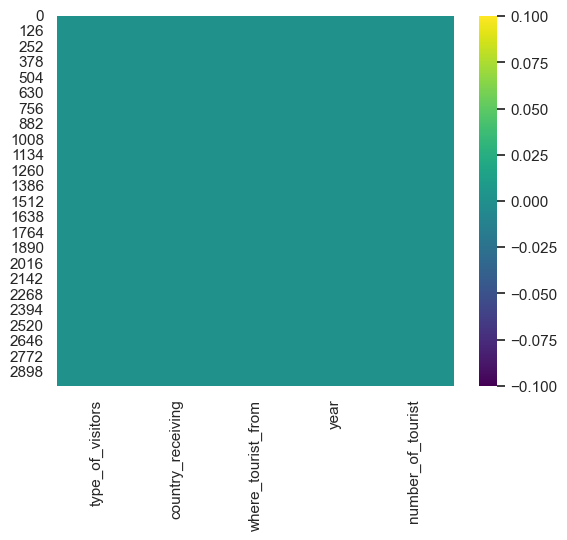

In [124]:
# checks missing value
df.isnull().sum()
sns.heatmap(df.isnull(),cmap ="viridis")

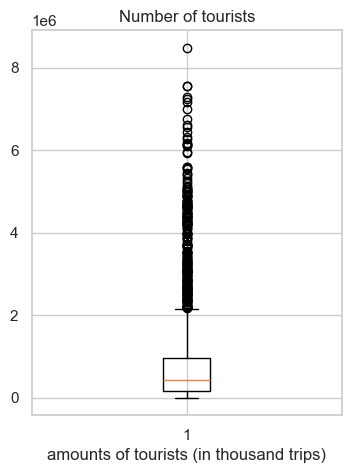

In [126]:
# boxplot to check outliers
plt.figure(figsize=(4, 5))
plt.boxplot(df["number_of_tourist"], vert=True)
plt.title("Number of tourists")
plt.xlabel("amounts of tourists (in thousand trips)")
plt.show()

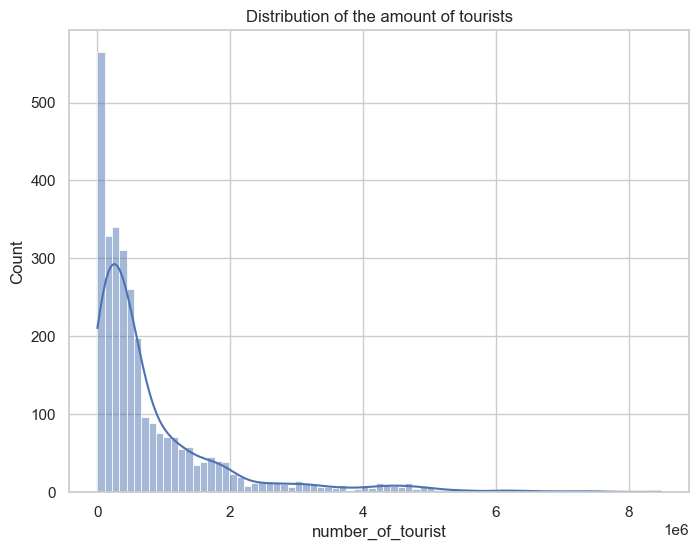

In [128]:
#  histogram of the number of tourists distribution
plt.figure(figsize=(8,6))
sns.histplot(df["number_of_tourist"],kde= True)
plt.title("Distribution of the amount of tourists")
plt.show()


# Interpretation

The histogram of the number of tourists shows a right-skewed distribution. That means
most countries/years record a low number of tourists, while a small number of observations
have very high values, forming clear outliers.
This indicates a strong disparity in tourism across Caribbean countries.

In [98]:
df[df["type_of_visitors"]=="total_visitors"].head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist
2239,total_visitors,Antigua and Barbuda,World,1995,"447,000"
2240,total_visitors,Antigua and Barbuda,World,1996,"498,000"
2241,total_visitors,Antigua and Barbuda,World,1997,"526,000"
2242,total_visitors,Antigua and Barbuda,World,1998,"570,000"
2243,total_visitors,Antigua and Barbuda,World,1999,"560,000"


In [100]:
df["type_of_visitors"].unique()

array(['excursionists', 'tourists', 'total_visitors'], dtype=object)

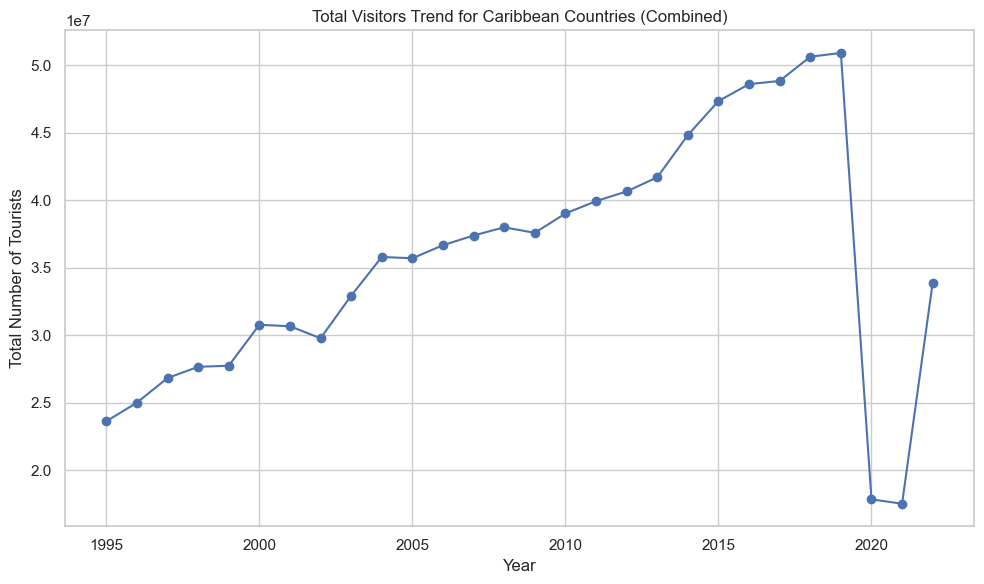

In [102]:

# List of Caribbean countries
caribbean_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bermuda', 'Belize',
    'British Virgin Islands', 'Cayman Islands', 'Cuba', 'Dominica',
    'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica',
    'Martinique', 'Montserrat', 'Curaçao', 'Aruba',
    'Sint Maarten (Dutch part)', 'Puerto Rico',
    'Saint Kitts and Nevis', 'Anguilla', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
    'Turks and Caicos Islands', 'United States Virgin Islands',
    'Bonaire', 'Saba', 'St. Eustatius'
]
#  Filter only total visitors
df_total = df[df["type_of_visitors"] == "total_visitors"]

# Filter only Caribbean countries
df_caribbean = df_total[df_total["country_receiving"].isin(caribbean_countries)]

# Aggregate: sum of all Caribbean countries by year 
df_trend = df_caribbean.groupby("year")["number_of_tourist"].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(df_trend["year"], df_trend["number_of_tourist"], marker="o")

plt.title("Total Visitors Trend for Caribbean Countries (Combined)")
plt.xlabel("Year")
plt.ylabel("Total Number of Tourists")
plt.grid(True)
plt.tight_layout()
plt.show()


# The Tourist Trend in the Caribbean region

The overall trend of tourist arrivals in the Caribbean region shows steady growth over the years.
Although some periods present slight declines, the most significant drop occurred between 2019 and 2020,
mainly due to global travel restrictions(COVID-19). Beginning in 2022, the region experienced a strong 
rebound, indicating a clear recovery in international tourism.

The line chart comparing total tourist arrivals by country reveals a sharp downward pattern across
Caribbean nations. A small number of countries receive an exceptionally high number of visitors,
while most others attract far fewer tourists. This demonstrates a strong inequality in the distribution
of tourism within the region, with tourism being highly concentrated in a handful of major destinations.

Overall, the Caribbean tourism landscape is characterized by both long-term regional growth and significant disparities between countries, where a few nations dominate the market while many others remain less visited.